In [1]:
pip install pyreadstat

In [2]:
pip install sas7bdat

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pyreadstat

# .sas7bdat 파일 읽기
df, meta = pyreadstat.read_sas7bdat("../data/hn23_all.sas7bdat")

# 데이터 확인
print(df.head())

# 메타데이터(라벨, 타입 정보 등) 확인
print(meta.column_labels)
print(meta.column_names)

         mod_d          ID    ID_fam    year  region  town_t  apt_t   psu  \
0  2024.12.10.  YA84208301  YA842083  2023.0     1.0     1.0    2.0  YA84   
1  2024.12.10.  YA84208302  YA842083  2023.0     1.0     1.0    2.0  YA84   
2  2024.12.10.  YA84212402  YA842124  2023.0     1.0     1.0    2.0  YA84   
3  2024.12.10.  YA84212404  YA842124  2023.0     1.0     1.0    2.0  YA84   
4  2024.12.10.  YA84242702  YA842427  2023.0     1.0     1.0    2.0  YA84   

   sex   age  ...      N_CAROT     N_RETIN      N_B1      N_B2     N_NIAC  \
0  1.0  75.0  ...  2704.555129   22.304061  0.689636  0.911565   4.519287   
1  2.0  70.0  ...  1190.505880   44.455061  1.010501  0.839130   6.333379   
2  2.0  42.0  ...  6752.011600  364.273465  1.839332  3.257774  24.363661   
3  2.0   9.0  ...  2213.362823  893.834459  1.873845  2.962366  22.194257   
4  1.0  43.0  ...  2136.906180  309.283062  1.086500  2.021552  10.360013   

     N_FOLATE     N_VITC  LF_SECUR_Y  LF_BUYER  LF_SAFE  
0  108.528994  2

In [4]:
label_to_colname = dict(zip(meta.column_labels, meta.column_names))
print(label_to_colname)
labels_of_interest = ["성별","나이","신장", "체중",'체질량지수','에너지 섭취량(Kcal)','식사요법 이유','평소 식사량과 비교','고강도 신체활동 여부: 여가','중강도 신체활동 여부: 여가']

selected_cols = [
    label_to_colname[label]
    for label in labels_of_interest
    if label in label_to_colname
]

df_subset = df[selected_cols]
print(df_subset.head())

{'최종 DB 수정일': 'mod_d', '개인 아이디': 'ID', '가구 아이디': 'ID_fam', '조사연도': 'year', '시도': 'region', '동읍면': 'town_t', '아파트 구분': 'apt_t', '조사구번호': 'psu', '성별': 'sex', '나이': 'age', '월령': 'age_month', '소득4분위수(개인)': 'incm', '소득4분위수(가구)': 'ho_incm', '소득5분위수(개인)': 'incm5', '소득5분위수(가구)': 'ho_incm5', '교육수준 재분류 코드': 'edu', '직업재분류 및 실업/비경제활동인구상태 코드': 'occp', '가구조사 가중치': 'wt_hs', '건강설문,검진조사 가중치': 'wt_itvex', '구강검진검사 가중치': 'wt_oe', '영양조사 가중치': 'wt_ntr', '건강설문,검진,영양조사 가중치': 'wt_tot', '구강검진, 영양조사 가중치': 'wt_oent', '분산추정 층': 'kstrata', '가구원수': 'cfam', '가구세대구성코드': 'genertn', '기초생활수급 여부': 'allownc', '주택소유여부': 'house', '주택형태': 'live_t', '가구총소득(개방형): 소득단위': 'ainc_unit1', '가구총소득(개방형): 소득액': 'ainc_1', '월평균 가구총소득': 'ainc', '결혼여부': 'marri_1', '결혼상태': 'marri_2', '가구주와의 관계': 'fam_rela', '건강보험종류': 'tins', '민간의료보험 가입 여부': 'npins', '아버지 아이디': 'ID_F', '어머니 아이디': 'ID_M', '주관적 건강인지': 'D_1_1', '최근2주간 몸이 불편했던 경험 유무': 'D_2_1', '최근2주간 불편감일수': 'D_2_wk', '고혈압 의사진단 여부': 'DI1_dg', '고혈압 진단시기': 'DI1_ag', '고혈압 현재 유병 여부': 'DI1_pr', '고혈압 치

In [5]:
# 컬럼명 바꾸고 중간 저장
df_subset.rename(columns={'age':"나이",'sex':'성별','HE_ht': "신장",'HE_wt': "체중",'HE_BMI':'체질량지수','N_EN':'에너지 섭취량(Kcal)','N_DIET_WHY':'식사요법 이유','N_DUSUAL':'평소 식사량과 비교','BE3_75':'고강도 신체활동 여부','BE3_85':'중강도 신체활동 여부'},inplace=True)
df_subset.to_csv('../data/korean_data.csv',index=False)
df_subset

C:\Users\soomi\AppData\Local\Temp\ipykernel_18476\1229307313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset.rename(columns={'age':"나이",'sex':'성별','HE_ht': "신장",'HE_wt': "체중",'HE_BMI':'체질량지수','N_EN':'에너지 섭취량(Kcal)','N_DIET_WHY':'식사요법 이유','N_DUSUAL':'평소 식사량과 비교','BE3_75':'고강도 신체활동 여부','BE3_85':'중강도 신체활동 여부'},inplace=True)


,성별,나이,신장,체중,체질량지수,에너지 섭취량(Kcal),식사요법 이유,평소 식사량과 비교,고강도 신체활동 여부,중강도 신체활동 여부
0,1.0,75.0,159.8,58.9,23.065440,624.642550,8.0,3,2.0,2.0
1,2.0,70.0,151.2,41.8,18.284063,922.289958,8.0,2,2.0,2.0
2,2.0,42.0,156.7,53.5,21.787921,3521.884974,2.0,2,2.0,2.0
3,2.0,9.0,142.0,35.8,17.754414,3476.032477,8.0,1,8.0,8.0
4,1.0,43.0,185.0,79.8,23.316289,2624.110312,8.0,2,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...
6924,1.0,80.0,162.4,63.3,24.001128,1346.633466,8.0,2,2.0,2.0
6925,2.0,78.0,157.3,71.7,28.977553,1838.070072,8.0,2,2.0,1.0
6926,2.0,61.0,145.1,40.2,19.093750,1686.294918,8.0,2,2.0,1.0
6927,1.0,57.0,172.8,74.4,24.916409,1629.256388,2.0,2,2.0,1.0


In [6]:
# 한국인 데이터 전처리
import pandas as pd
korean_data=pd.read_csv('../data/korean_data.csv')
korean_data

,성별,나이,신장,체중,체질량지수,에너지 섭취량(Kcal),식사요법 이유,평소 식사량과 비교,고강도 신체활동 여부,중강도 신체활동 여부
0,1.0,75.0,159.8,58.9,23.065440,624.642550,8.0,3.0,2.0,2.0
1,2.0,70.0,151.2,41.8,18.284063,922.289958,8.0,2.0,2.0,2.0
2,2.0,42.0,156.7,53.5,21.787921,3521.884974,2.0,2.0,2.0,2.0
3,2.0,9.0,142.0,35.8,17.754414,3476.032477,8.0,1.0,8.0,8.0
4,1.0,43.0,185.0,79.8,23.316289,2624.110312,8.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...
6924,1.0,80.0,162.4,63.3,24.001128,1346.633466,8.0,2.0,2.0,2.0
6925,2.0,78.0,157.3,71.7,28.977553,1838.070072,8.0,2.0,2.0,1.0
6926,2.0,61.0,145.1,40.2,19.093750,1686.294918,8.0,2.0,2.0,1.0
6927,1.0,57.0,172.8,74.4,24.916409,1629.256388,2.0,2.0,2.0,1.0


In [7]:
# 결측치 확인하기 
# 성별 1:남자, 2:여자
# 식사요법이유 1:질환,2:체중을조절하기위해서 3:기타 8:비해당 9모름
# 평소 식사량과 비교 : 1. 많이 섭취하였다 2. 평소와 비슷하였다 3. 적게 섭취하였다
# 고강도 신체활동여부 1:예, 2:아니오 8:비해당 9:모름
# 중강도 신체활동여부 1:예, 2:아니오 8:비해당 9:모름
korean_data[korean_data.isna().any(axis=1)]

,성별,나이,신장,체중,체질량지수,에너지 섭취량(Kcal),식사요법 이유,평소 식사량과 비교,고강도 신체활동 여부,중강도 신체활동 여부
7,1.0,53.0,NaN,NaN,NaN,2405.776439,8.0,1.0,9.0,9.0
57,1.0,59.0,164.8,75.0,27.615115,NaN,NaN,NaN,2.0,2.0
64,2.0,52.0,NaN,90.8,NaN,1479.626568,8.0,3.0,2.0,2.0
98,2.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0
135,1.0,16.0,NaN,NaN,NaN,2457.228521,2.0,1.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...
6753,1.0,62.0,164.5,69.8,25.794292,NaN,NaN,NaN,2.0,1.0
6812,1.0,60.0,163.2,67.4,25.305772,NaN,NaN,NaN,9.0,9.0
6835,2.0,62.0,149.6,52.1,23.279548,NaN,NaN,NaN,9.0,9.0
6891,1.0,30.0,179.7,62.4,19.323618,NaN,NaN,NaN,9.0,9.0


In [8]:
korean_data=korean_data[korean_data['평소 식사량과 비교']==2.0]

In [9]:
# 결측치 제거
korean_data.dropna(inplace=True)

C:\Users\soomi\AppData\Local\Temp\ipykernel_18476\2821118841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  korean_data.dropna(inplace=True)


In [10]:
# 고강도 신체활동여부 1:예, 2:아니오 8:비해당 9:모름
# 중강도 신체활동여부 1:예, 2:아니오 8:비해당 9:모름
korean_data=korean_data[(korean_data['고강도 신체활동 여부']!=8.0)]

In [11]:
# 초기값 설정
korean_data['활동량계수'] = '1.0'

# 조건에 따라 값 업데이트
korean_data.loc[
    (korean_data['고강도 신체활동 여부'] == 9.0) & (korean_data['중강도 신체활동 여부'] == 9.0),
    '활동량계수'
] = '1.15'

korean_data.loc[
    (korean_data['고강도 신체활동 여부'] == 2.0) & (korean_data['중강도 신체활동 여부'] == 1.0),
    '활동량계수'
] = '1.15'

korean_data.loc[
    (korean_data['고강도 신체활동 여부'] == 1.0) & (korean_data['중강도 신체활동 여부'] == 2.0),
    '활동량계수'
] = '1.26'

korean_data.loc[
    (korean_data['고강도 신체활동 여부'] == 1.0) & (korean_data['중강도 신체활동 여부'] == 1.0),
    '활동량계수'
] = '1.46'



In [12]:
#korean_data.drop('고강도 신체활동 여부',axis=1,inplace=True)
#korean_data.drop('중강도 신체활동 여부',axis=1,inplace=True)
korean_data.drop('식사요법 이유',axis=1,inplace=True)
korean_data.drop('평소 식사량과 비교',axis=1,inplace=True)
korean_data

,성별,나이,신장,체중,체질량지수,에너지 섭취량(Kcal),고강도 신체활동 여부,중강도 신체활동 여부,활동량계수
1,2.0,70.0,151.2,41.8,18.284063,922.289958,2.0,2.0,1.0
2,2.0,42.0,156.7,53.5,21.787921,3521.884974,2.0,2.0,1.0
4,1.0,43.0,185.0,79.8,23.316289,2624.110312,2.0,2.0,1.0
8,1.0,42.0,172.5,67.7,22.751523,2243.391641,2.0,2.0,1.0
18,2.0,38.0,160.9,43.4,16.764000,1649.091552,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...
6924,1.0,80.0,162.4,63.3,24.001128,1346.633466,2.0,2.0,1.0
6925,2.0,78.0,157.3,71.7,28.977553,1838.070072,2.0,1.0,1.15
6926,2.0,61.0,145.1,40.2,19.093750,1686.294918,2.0,1.0,1.15
6927,1.0,57.0,172.8,74.4,24.916409,1629.256388,2.0,1.0,1.15


In [13]:
korean_data['활동량계수'] = pd.to_numeric(korean_data['활동량계수'], errors='coerce')

# 초기 일일권장섭취량 열 추가
korean_data['일일권장섭취량'] = 0

# 성별이 1(남성)인 경우
korean_data.loc[korean_data['성별'] == 1.0, '일일권장섭취량'] = (
    662-
    9.53 * korean_data['나이'] +
    (15.91 * korean_data['체중'] +
    5.396 * korean_data['신장']
)* korean_data['활동량계수'])
# 성별이 2(여성)인 경우
korean_data.loc[korean_data['성별'] == 2.0, '일일권장섭취량'] = (
    354-
    6.91 * korean_data['나이'] +
    (9.36 * korean_data['체중'] +
    7.26 * korean_data['신장']
)* korean_data['활동량계수'])
korean_data

,성별,나이,신장,체중,체질량지수,에너지 섭취량(Kcal),고강도 신체활동 여부,중강도 신체활동 여부,활동량계수,일일권장섭취량
1,2.0,70.0,151.2,41.8,18.284063,922.289958,2.0,2.0,1.00,1359.26000
2,2.0,42.0,156.7,53.5,21.787921,3521.884974,2.0,2.0,1.00,1702.18200
4,1.0,43.0,185.0,79.8,23.316289,2624.110312,2.0,2.0,1.00,2520.08800
8,1.0,42.0,172.5,67.7,22.751523,2243.391641,2.0,2.0,1.00,2269.65700
18,2.0,38.0,160.9,43.4,16.764000,1649.091552,2.0,2.0,1.00,1665.77800
...,...,...,...,...,...,...,...,...,...,...
6924,1.0,80.0,162.4,63.3,24.001128,1346.633466,2.0,2.0,1.00,1783.01340
6925,2.0,78.0,157.3,71.7,28.977553,1838.070072,2.0,1.0,1.15,1900.09650
6926,2.0,61.0,145.1,40.2,19.093750,1686.294918,2.0,1.0,1.15,1576.64270
6927,1.0,57.0,172.8,74.4,24.916409,1629.256388,2.0,1.0,1.15,2552.34272


In [14]:
# 평소 식사량과 비교
korean_data[korean_data['에너지 섭취량(Kcal)']>=korean_data['일일권장섭취량']]

,성별,나이,신장,체중,체질량지수,에너지 섭취량(Kcal),고강도 신체활동 여부,중강도 신체활동 여부,활동량계수,일일권장섭취량
2,2.0,42.0,156.7,53.5,21.787921,3521.884974,2.0,2.0,1.00,1702.18200
4,1.0,43.0,185.0,79.8,23.316289,2624.110312,2.0,2.0,1.00,2520.08800
21,2.0,61.0,166.1,59.6,21.602648,2101.634152,2.0,1.0,1.15,1960.79330
27,2.0,58.0,155.6,52.7,21.766642,2970.682135,2.0,2.0,1.00,1576.14800
32,2.0,78.0,147.3,51.2,23.597417,2175.694993,2.0,1.0,1.15,1595.94450
...,...,...,...,...,...,...,...,...,...,...
6906,1.0,65.0,166.3,67.9,24.551910,3061.660800,2.0,1.0,1.15,2316.84037
6914,1.0,77.0,162.3,57.5,21.828847,3535.587367,2.0,2.0,1.00,1718.78580
6916,1.0,48.0,172.0,81.3,27.481071,3157.521515,2.0,2.0,1.00,2426.15500
6926,2.0,61.0,145.1,40.2,19.093750,1686.294918,2.0,1.0,1.15,1576.64270


In [15]:
korean_data.drop(['고강도 신체활동 여부','중강도 신체활동 여부','체질량지수'],axis=1,inplace=True)

In [16]:
# 체중 변화 예측해볼 데이터
korean_data['일일 칼로리 잉여/적자'] = korean_data['에너지 섭취량(Kcal)']-korean_data['일일권장섭취량']
# describe()를 사용해 25%와 75% 값 계산
q25 = korean_data['일일 칼로리 잉여/적자'].quantile(0.25)
q75 = korean_data['일일 칼로리 잉여/적자'].quantile(0.75)

# 25% ~ 75% 범위의 데이터 선택
korean_data = korean_data[(korean_data['일일 칼로리 잉여/적자'] >= q25) & (korean_data['일일 칼로리 잉여/적자'] <= q75)]

# 결과 확인
korean_data


,성별,나이,신장,체중,에너지 섭취량(Kcal),활동량계수,일일권장섭취량,일일 칼로리 잉여/적자
1,2.0,70.0,151.2,41.8,922.289958,1.00,1359.26000,-436.970042
8,1.0,42.0,172.5,67.7,2243.391641,1.00,2269.65700,-26.265359
18,2.0,38.0,160.9,43.4,1649.091552,1.00,1665.77800,-16.686448
19,2.0,34.0,162.8,68.4,1501.215719,1.00,1941.21200,-439.996281
22,1.0,46.0,165.3,62.0,1874.773750,1.15,2383.75562,-508.981870
...,...,...,...,...,...,...,...,...
6915,2.0,72.0,153.2,60.2,1294.454663,1.00,1532.18400,-237.729337
6919,2.0,36.0,165.7,55.9,1381.958947,1.00,1831.44600,-449.487053
6922,2.0,62.0,158.6,59.7,1067.107202,1.00,1635.80800,-568.700798
6924,1.0,80.0,162.4,63.3,1346.633466,1.00,1783.01340,-436.379934


In [17]:
korean_data=korean_data[['나이','성별','신장','체중','활동량계수','일일권장섭취량','에너지 섭취량(Kcal)','일일 칼로리 잉여/적자']]

In [18]:
korean_data.reset_index(drop=True)

,나이,성별,신장,체중,활동량계수,일일권장섭취량,에너지 섭취량(Kcal),일일 칼로리 잉여/적자
0,70.0,2.0,151.2,41.8,1.00,1359.26000,922.289958,-436.970042
1,42.0,1.0,172.5,67.7,1.00,2269.65700,2243.391641,-26.265359
2,38.0,2.0,160.9,43.4,1.00,1665.77800,1649.091552,-16.686448
3,34.0,2.0,162.8,68.4,1.00,1941.21200,1501.215719,-439.996281
4,46.0,1.0,165.3,62.0,1.15,2383.75562,1874.773750,-508.981870
...,...,...,...,...,...,...,...,...
2144,72.0,2.0,153.2,60.2,1.00,1532.18400,1294.454663,-237.729337
2145,36.0,2.0,165.7,55.9,1.00,1831.44600,1381.958947,-449.487053
2146,62.0,2.0,158.6,59.7,1.00,1635.80800,1067.107202,-568.700798
2147,80.0,1.0,162.4,63.3,1.00,1783.01340,1346.633466,-436.379934


# 시각화

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib import rc

# 한글 폰트 설정
rc('font', family='Malgun Gothic')  # Windows 환경
# rc('font', family='AppleGothic')  # Mac 환경

# 음수 표시 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


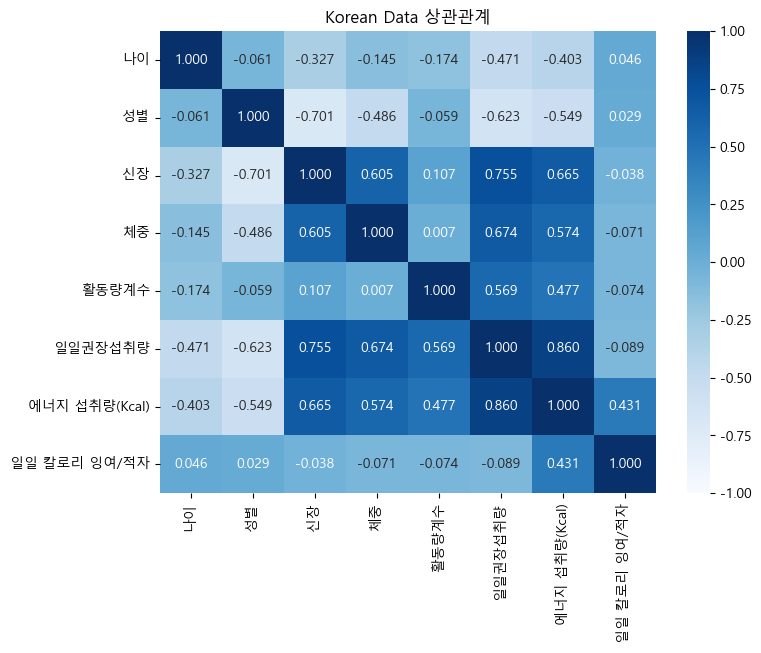

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(korean_data.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, fmt='.3f', cmap='Blues')
plt.title('Korean Data 상관관계')
plt.show()

C:\Users\soomi\AppData\Local\Temp\ipykernel_18476\1625581600.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  korean_data['연령대'] = pd.cut(korean_data['나이'], bins=bins, labels=labels, right=False)


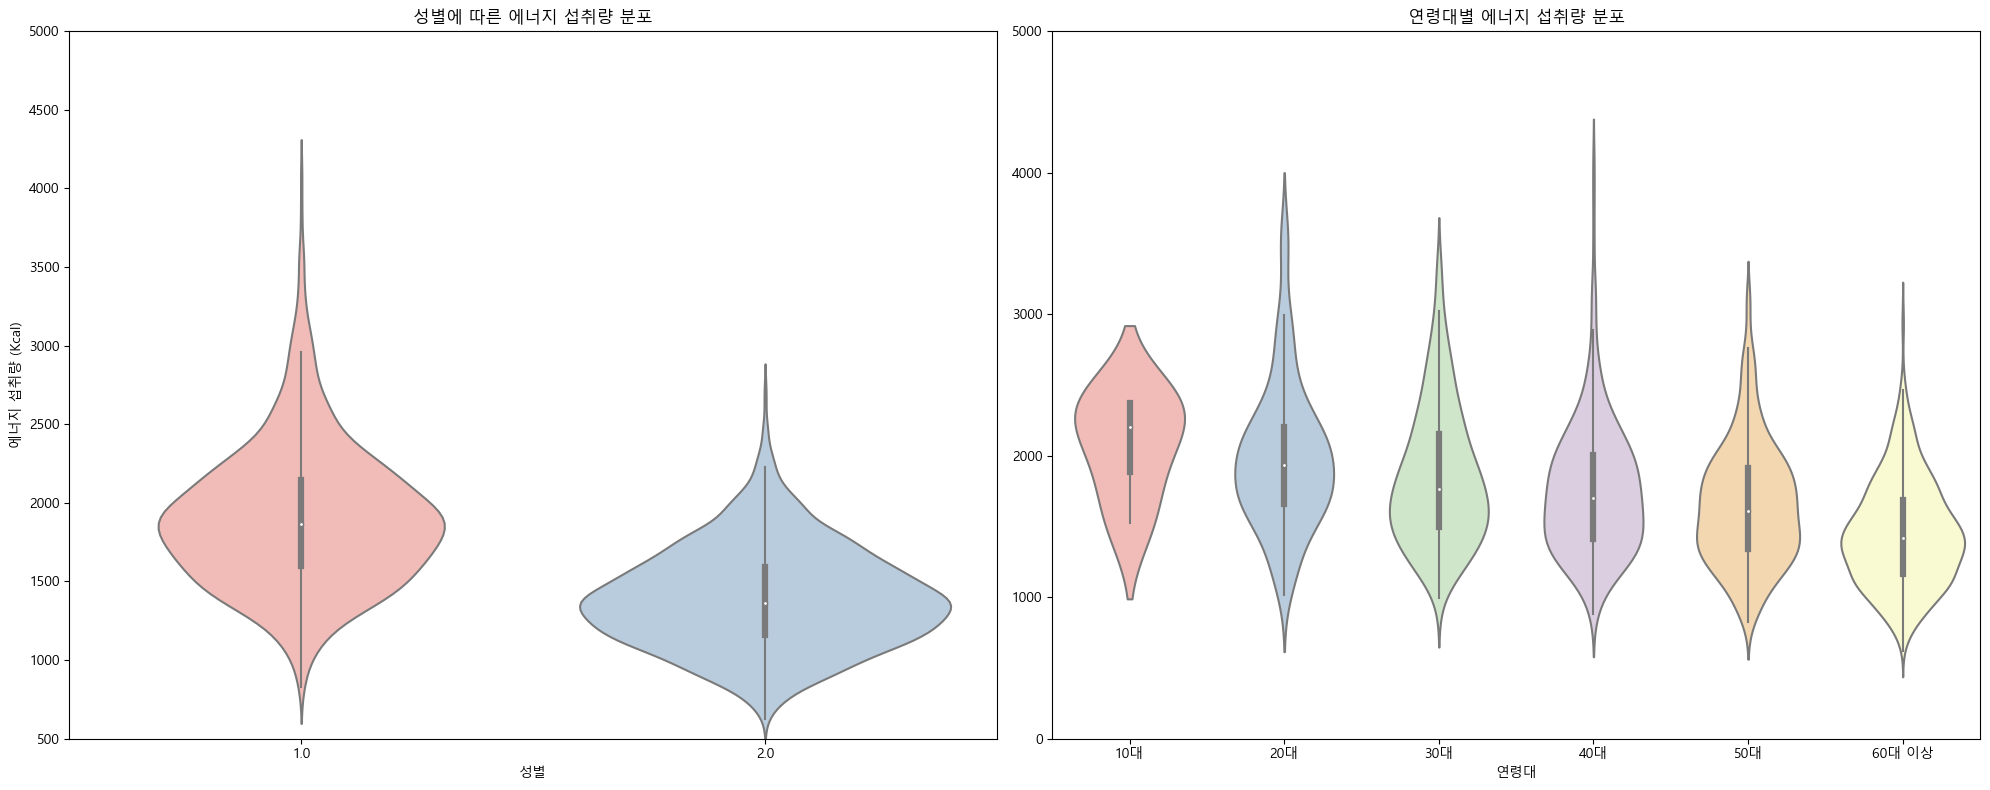

In [21]:
# 서브플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# 성별에 따른 에너지 섭취량 분포
sns.violinplot(data=korean_data, x='성별', y='에너지 섭취량(Kcal)', palette='Pastel1', ax=axes[0])
axes[0].set_title("성별에 따른 에너지 섭취량 분포")
axes[0].set_ylim(500,5000)
axes[0].set_xlabel("성별")
axes[0].set_ylabel("에너지 섭취량 (Kcal)")

# 연령대별 에너지 섭취량 분포
bins = [10, 20, 30, 40, 50, 60, 100]
labels = ['10대', '20대', '30대', '40대', '50대', '60대 이상']
korean_data['연령대'] = pd.cut(korean_data['나이'], bins=bins, labels=labels, right=False)

sns.violinplot(data=korean_data, x='연령대', y='에너지 섭취량(Kcal)', palette='Pastel1', ax=axes[1])
axes[1].set_title("연령대별 에너지 섭취량 분포")
axes[1].set_xlabel("연령대")
axes[1].set_ylabel("")
axes[1].set_ylim(0, 5000)  # y축 범위 설정

# 전체 레이아웃 조정
plt.tight_layout()
plt.show()

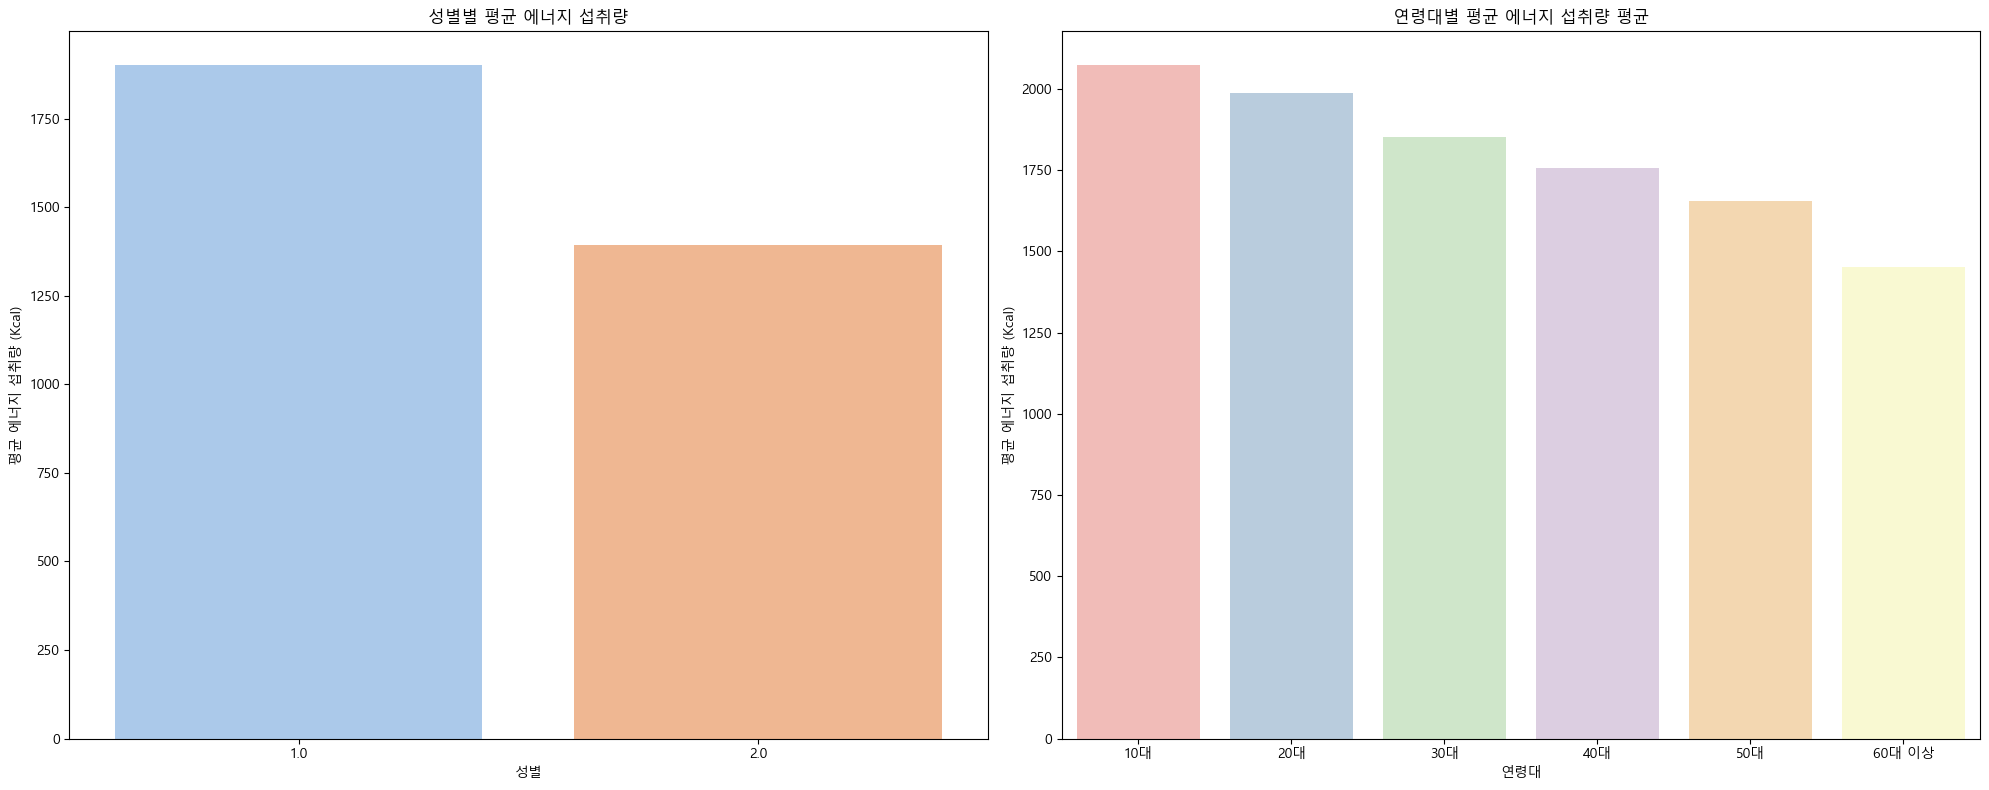

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 성별별 에너지 섭취량 평균 계산
gender_mean = korean_data.groupby('성별')['에너지 섭취량(Kcal)'].mean().reset_index()

# 연령대별 에너지 섭취량 평균 계산
bins = [10, 20, 30, 40, 50, 60, 100]
labels = ['10대', '20대', '30대', '40대', '50대', '60대 이상']
age_group_mean = korean_data.groupby('연령대')['에너지 섭취량(Kcal)'].mean().reset_index()

# 서브플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# 성별 평균 그래프
sns.barplot(data=gender_mean, x='성별', y='에너지 섭취량(Kcal)', palette='pastel', ax=axes[0])
axes[0].set_title("성별별 평균 에너지 섭취량")
axes[0].set_xlabel("성별")
axes[0].set_ylabel("평균 에너지 섭취량 (Kcal)")

# 연령대 평균 그래프
sns.barplot(data=age_group_mean, x='연령대', y='에너지 섭취량(Kcal)', palette='Pastel1', ax=axes[1])
axes[1].set_title("연령대별 평균 에너지 섭취량 평균")
axes[1].set_xlabel("연령대")
axes[1].set_ylabel("평균 에너지 섭취량 (Kcal)")

# 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()


In [23]:
korean_data.drop(columns=['연령대'], inplace=True)
korean_data.columns=['나이','성별','신장','체중','활동량계수','BMR','에너지 섭취량(Kcal)','일일 칼로리 잉여/적자']

In [24]:
# 학습할 데이터
pd.set_option('display.max_rows', 100)
weight_change=pd.read_csv('../data/weight_change_dataset.csv')
weight_change

,Participant ID,Age,Gender,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,Final Weight (lbs)
0,1,56,M,228.4,3102.3,3916.0,813.7,0.200000,1,Sedentary,Excellent,6,228.6
1,2,46,F,165.4,2275.5,3823.0,1547.5,2.400000,6,Very Active,Excellent,6,167.8
2,3,32,F,142.8,2119.4,2785.4,666.0,1.400000,7,Sedentary,Good,3,144.2
3,4,25,F,145.5,2181.3,2587.3,406.0,0.800000,8,Sedentary,Fair,2,146.3
4,5,38,M,155.5,2463.8,3312.8,849.0,2.000000,10,Lightly Active,Good,1,157.5
5,6,56,F,152.9,2100.6,2262.4,161.9,-12.513498,9,Sedentary,Poor,6,140.4
6,7,36,M,107.3,1991.3,2933.4,942.1,-2.437307,2,Moderately Active,Poor,5,104.9
7,8,40,M,207.9,2977.9,4000.0,1022.1,-35.678115,11,Moderately Active,Poor,9,172.2
8,9,28,F,169.5,2406.9,3890.2,1483.4,-8.476633,10,Very Active,Poor,1,161.0
9,10,28,F,169.2,2403.3,2485.8,82.5,0.000000,2,Sedentary,Excellent,7,169.2


In [25]:
weight_change.drop(['Participant ID','Sleep Quality','Stress Level','Final Weight (lbs)','Duration (weeks)'],axis=1,inplace=True)

In [26]:
weight_change=weight_change.rename(columns={'Age':'나이','Gender':'성별','Current Weight (lbs)':'체중','BMR (Calories)':'BMR','Daily Calories Consumed':'에너지 섭취량(Kcal)','Daily Caloric Surplus/Deficit':'일일 칼로리 잉여/적자','Weight Change (lbs)':'체중변화','Physical Activity Level':'활동량계수'})

In [27]:
# 조건에 따라 값 업데이트
weight_change.loc[weight_change['활동량계수'] == 'Sedentary', '활동량계수'] = '1.0'
weight_change.loc[weight_change['활동량계수'] == 'Lightly Active', '활동량계수'] = '1.15'
weight_change.loc[weight_change['활동량계수'] == 'Moderately Active', '활동량계수'] = '1.26'
weight_change.loc[weight_change['활동량계수'] == 'Very Active', '활동량계수'] = '1.46'

weight_change.loc[weight_change['성별'] == 'M', '성별']='1.0'
weight_change.loc[weight_change['성별'] == 'F', '성별']='2.0'

In [28]:
# 신장 초기화 (0으로 설정)
weight_change['신장'] = 0

# 남성: 성별이 M인 경우
weight_change.loc[weight_change['성별'] == '1.0', '신장'] = (
    ((weight_change['BMR']) -
     (10 * weight_change['체중']) +
     (5 * weight_change['나이']) -
     5) / 6.25
)

# 여성: 성별이 F인 경우
weight_change.loc[weight_change['성별'] == '2.0', '신장'] = (
    ((weight_change['BMR']) -
     (10 * weight_change['체중']) +
     (5 * weight_change['나이']) +
     161) / 6.25
)
weight_change

,나이,성별,체중,BMR,에너지 섭취량(Kcal),일일 칼로리 잉여/적자,체중변화,활동량계수,신장
0,56,1.0,228.4,3102.3,3916.0,813.7,0.200000,1.0,174.928
1,46,2.0,165.4,2275.5,3823.0,1547.5,2.400000,1.46,162.000
2,32,2.0,142.8,2119.4,2785.4,666.0,1.400000,1.0,161.984
3,25,2.0,145.5,2181.3,2587.3,406.0,0.800000,1.0,161.968
4,38,1.0,155.5,2463.8,3312.8,849.0,2.000000,1.15,175.008
5,56,2.0,152.9,2100.6,2262.4,161.9,-12.513498,1.0,162.016
6,36,1.0,107.3,1991.3,2933.4,942.1,-2.437307,1.26,174.928
7,40,1.0,207.9,2977.9,4000.0,1022.1,-35.678115,1.26,175.024
8,28,2.0,169.5,2406.9,3890.2,1483.4,-8.476633,1.46,162.064
9,28,2.0,169.2,2403.3,2485.8,82.5,0.000000,1.0,161.968


In [29]:
weight_change['체중']=weight_change['체중']*0.453592

In [30]:
weight_change['체중변화']=weight_change['체중변화']*0.453592

In [31]:
weight_change['성별']=pd.to_numeric(weight_change['성별'])

In [32]:
weight_change.to_csv('../data/weight_predict.csv',index=False)

In [33]:
dataset=pd.read_csv('../data/weight_predict.csv',delimiter=',',encoding='utf8')
new_order=['나이','성별','신장','체중','활동량계수','BMR','에너지 섭취량(Kcal)','일일 칼로리 잉여/적자','체중변화']
dataset=dataset[new_order]
dataset

,나이,성별,신장,체중,활동량계수,BMR,에너지 섭취량(Kcal),일일 칼로리 잉여/적자,체중변화
0,56,1.0,174.928,103.600413,1.00,3102.3,3916.0,813.7,0.090718
1,46,2.0,162.000,75.024117,1.46,2275.5,3823.0,1547.5,1.088621
2,32,2.0,161.984,64.772938,1.00,2119.4,2785.4,666.0,0.635029
3,25,2.0,161.968,65.997636,1.00,2181.3,2587.3,406.0,0.362874
4,38,1.0,175.008,70.533556,1.15,2463.8,3312.8,849.0,0.907184
5,56,2.0,162.016,69.354217,1.00,2100.6,2262.4,161.9,-5.676023
6,36,1.0,174.928,48.670422,1.26,1991.3,2933.4,942.1,-1.105543
7,40,1.0,175.024,94.301777,1.26,2977.9,4000.0,1022.1,-16.183308
8,28,2.0,162.064,76.883844,1.46,2406.9,3890.2,1483.4,-3.844933
9,28,2.0,161.968,76.747766,1.00,2403.3,2485.8,82.5,0.000000


In [34]:
# BMR 계산 함수
def calculate_bmr(dataset):
    if dataset["성별"] == 1.0:  # 남성
        return 10 * dataset["체중"] + 6.25 * dataset["신장"] - 5 * dataset["나이"] + 5
    elif dataset["성별"] == 2.0:  # 여성
        return 10 * dataset["체중"] + 6.25 * dataset["신장"] - 5 * dataset["나이"] - 161

# BMR 열 추가
dataset["BMR"] = dataset.apply(calculate_bmr, axis=1)

dataset['에너지 섭취량(Kcal)'] =dataset['에너지 섭취량(Kcal)']*0.453592*dataset['활동량계수']
dataset['일일 칼로리 잉여/적자'] =dataset['에너지 섭취량(Kcal)']-dataset["BMR"]*dataset['활동량계수']
dataset

,나이,성별,신장,체중,활동량계수,BMR,에너지 섭취량(Kcal),일일 칼로리 잉여/적자,체중변화
0,56,1.0,174.928,103.600413,1.00,1854.304128,1776.266272,-78.037856,0.090718
1,46,2.0,162.000,75.024117,1.46,1371.741168,2531.760035,529.017930,1.088621
2,32,2.0,161.984,64.772938,1.00,1339.129376,1263.435157,-75.694219,0.635029
3,25,2.0,161.968,65.997636,1.00,1386.276360,1173.578582,-212.697778,0.362874
4,38,1.0,175.008,70.533556,1.15,1614.135560,1728.058514,-128.197380,0.907184
5,56,2.0,162.016,69.354217,1.00,1265.142168,1026.206541,-238.935627,-5.676023
6,36,1.0,174.928,48.670422,1.26,1405.004216,1676.514134,-93.791178,-1.105543
7,40,1.0,175.024,94.301777,1.26,1841.917768,2286.103680,-34.712708,-16.183308
8,28,2.0,162.064,76.883844,1.46,1480.738440,2576.262854,414.384731,-3.844933
9,28,2.0,161.968,76.747766,1.00,1478.777664,1127.538994,-351.238670,0.000000


In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
import tensorflow as tf
import matplotlib.pyplot as plt

In [36]:
# 종속변수 : 체중변화 # 독립변수: 나머지변수
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X= dataset[['나이','성별','신장','체중','활동량계수','BMR','에너지 섭취량(Kcal)','일일 칼로리 잉여/적자']]
X_scaled = scaler_X.fit_transform(X)
y= dataset[['체중변화']]
y_scaled = scaler_y.fit_transform(y)

Text(0.5, 1.0, 'Korean Data 상관관계')

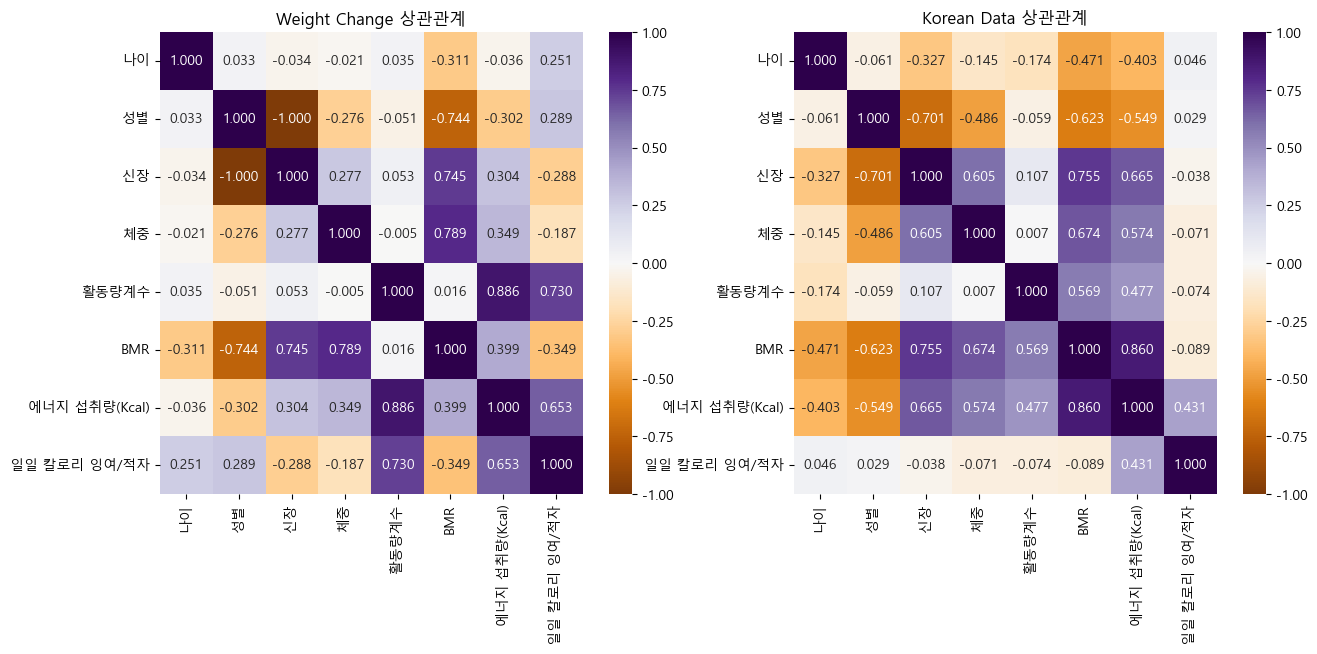

In [37]:
# 상관관계

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
# 첫 번째 서브플롯: weight_change 데이터 상관관계 히트맵
sns.heatmap(
    X.corr(numeric_only=True), 
    vmin=-1, vmax=1, annot=True, fmt='.3f', cmap='PuOr', 
    ax=axes[0]
)
axes[0].set_title("Weight Change 상관관계")

# 두 번째 서브플롯: korean_data 데이터 상관관계 히트맵
sns.heatmap(
    korean_data.corr(numeric_only=True), 
    vmin=-1, vmax=1, annot=True, fmt='.3f', cmap='PuOr', 
    ax=axes[1]
)
axes[1].set_title("Korean Data 상관관계")

C:\Users\soomi\AppData\Local\Temp\ipykernel_18476\1088813281.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(weight_change[var], label='weight change', color='blue', shade=True, ax=axes[i])
C:\Users\soomi\AppData\Local\Temp\ipykernel_18476\1088813281.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(korean_data[var], label='korean_data', color='red', shade=True, ax=axes[i])
C:\Users\soomi\AppData\Local\Temp\ipykernel_18476\1088813281.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(weight_change[var], label='weight change', color='blue', shade=True, ax=axes[i])
C:\Users\soomi\AppData\Local\Temp\ipykernel_18476\1

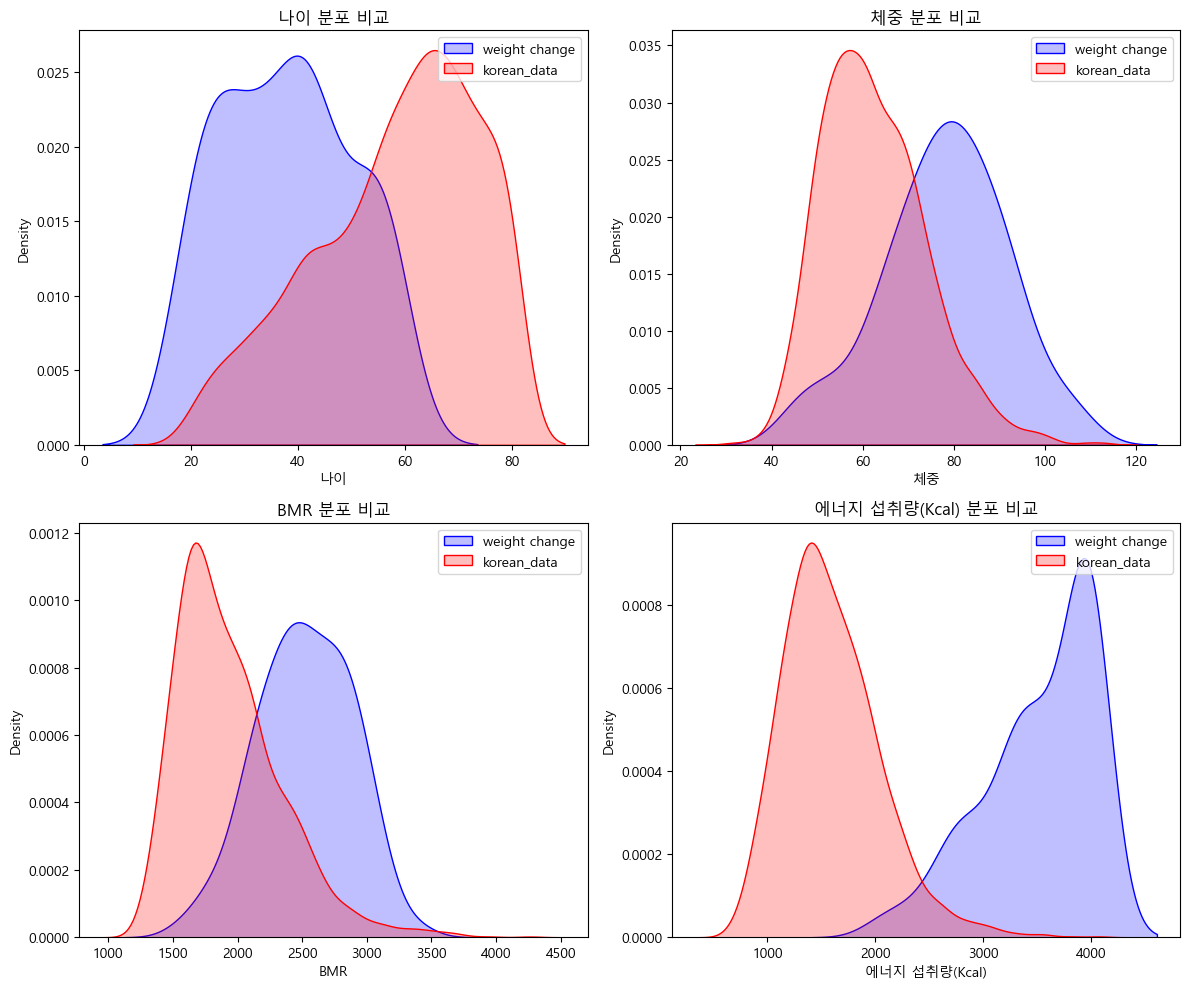

In [39]:
# 학습데이터와 예측 데이터 분포비교
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
# 변수별 분포 비교를 2x2 서브플롯으로 그리기
variables = ['나이', '체중', 'BMR', '에너지 섭취량(Kcal)']

for i, var in enumerate(variables):
    sns.kdeplot(weight_change[var], label='weight change', color='blue', shade=True, ax=axes[i])
    sns.kdeplot(korean_data[var], label='korean_data', color='red', shade=True, ax=axes[i])
    axes[i].set_title(f'{var} 분포 비교')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [40]:
# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2,)

X_train.shape, y_train.shape,X_test.shape,y_test.shape

((80, 8), (80, 1), (20, 8), (20, 1))

In [41]:
# 모델 구성
model = Sequential()
model.add(Dense(128, activation='LeakyReLU', input_dim =8))  # 입력층

model.add(Dense(64, activation='LeakyReLU'))  # 은닉층
model.add(Dense(32, activation='LeakyReLU'))  # 은닉층

model.add(Dense(1,activation='linear'))  # 출력층

# 모델 요약 출력
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [42]:
# 4. 모델 학습과정 설정(손실함수, 옵티마이저, 평가지표)
model.compile(loss='mse',optimizer="adam",metrics=['mae'])
loss, mae = model.evaluate(X_test, y_test)
print(f"테스트 세트 - 손실(MSE): {loss:.4f}, 평균 절대 오차(MAE): {mae:.4f}")

1/1 [==============================] - 1s 729ms/step - loss: 1.1434 - mae: 0.8884
테스트 세트 - 손실(MSE): 1.1434, 평균 절대 오차(MAE): 0.8884


In [43]:
# 5. 학습시키기
hist = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=150, batch_size=32)

Epoch 1/150
2/2 [==============================] - 0s 43ms/step - loss: 1.1347 - mae: 0.8622 - val_loss: 1.7351 - val_mae: 0.9893
Epoch 2/150
2/2 [==============================] - 0s 20ms/step - loss: 0.8692 - mae: 0.7028 - val_loss: 1.6250 - val_mae: 0.8665
Epoch 3/150
2/2 [==============================] - 0s 19ms/step - loss: 0.7695 - mae: 0.6189 - val_loss: 1.6107 - val_mae: 0.8089
Epoch 4/150
2/2 [==============================] - 0s 20ms/step - loss: 0.7188 - mae: 0.5788 - val_loss: 1.6080 - val_mae: 0.7807
Epoch 5/150
2/2 [==============================] - 0s 22ms/step - loss: 0.7011 - mae: 0.5536 - val_loss: 1.6217 - val_mae: 0.7683
Epoch 6/150
2/2 [==============================] - 0s 21ms/step - loss: 0.7010 - mae: 0.5429 - val_loss: 1.6326 - val_mae: 0.7785
Epoch 7/150
2/2 [==============================] - 0s 19ms/step - loss: 0.6980 - mae: 0.5366 - val_loss: 1.6215 - val_mae: 0.7968
Epoch 8/150
2/2 [==============================] - 0s 19ms/step - loss: 0.6820 - mae: 0.53

2/2 [==============================] - 0s 19ms/step - loss: 0.1266 - mae: 0.2400 - val_loss: 1.7383 - val_mae: 1.0147
Epoch 126/150
2/2 [==============================] - 0s 20ms/step - loss: 0.1222 - mae: 0.2338 - val_loss: 1.7549 - val_mae: 1.0074
Epoch 127/150
2/2 [==============================] - 0s 21ms/step - loss: 0.1208 - mae: 0.2305 - val_loss: 1.7520 - val_mae: 1.0096
Epoch 128/150
2/2 [==============================] - 0s 20ms/step - loss: 0.1182 - mae: 0.2347 - val_loss: 1.7137 - val_mae: 1.0138
Epoch 129/150
2/2 [==============================] - 0s 19ms/step - loss: 0.1214 - mae: 0.2327 - val_loss: 1.7179 - val_mae: 1.0108
Epoch 130/150
2/2 [==============================] - 0s 20ms/step - loss: 0.1121 - mae: 0.2250 - val_loss: 1.7432 - val_mae: 1.0020
Epoch 131/150
2/2 [==============================] - 0s 21ms/step - loss: 0.1176 - mae: 0.2378 - val_loss: 1.7137 - val_mae: 0.9965
Epoch 132/150
2/2 [==============================] - 0s 20ms/step - loss: 0.1112 - mae: 0.

In [44]:
hist.history

{'loss': [1.1347321271896362,
  0.8691614270210266,
  0.7695011496543884,
  0.7188140749931335,
  0.7010775804519653,
  0.700984537601471,
  0.6979512572288513,
  0.6819789409637451,
  0.6646246314048767,
  0.6477957963943481,
  0.6354203820228577,
  0.6264227032661438,
  0.6191512942314148,
  0.6107043623924255,
  0.6067945957183838,
  0.5984444618225098,
  0.5898462533950806,
  0.5832312703132629,
  0.5760732293128967,
  0.5691605806350708,
  0.5616875886917114,
  0.5565302968025208,
  0.548163652420044,
  0.5417237877845764,
  0.5357619524002075,
  0.527935802936554,
  0.5213704109191895,
  0.5165976881980896,
  0.5114614963531494,
  0.5043929219245911,
  0.49792638421058655,
  0.4913349747657776,
  0.4865722358226776,
  0.47863203287124634,
  0.47452878952026367,
  0.4692423343658447,
  0.4621046185493469,
  0.4557645916938782,
  0.4499293565750122,
  0.44880932569503784,
  0.4405907690525055,
  0.4341646730899811,
  0.42959415912628174,
  0.42644649744033813,
  0.41785335540771484

In [45]:
y_pred = model.predict(X_test)
for y,h in zip(y_test,y_pred):
    print(f'실제값:{y},예측값:{h[0]:.2f}')

1/1 [==============================] - 0s 64ms/step
실제값:[-2.12791156],예측값:-1.85
실제값:[0.96940623],예측값:0.89
실제값:[-0.21062813],예측값:-0.17
실제값:[0.24551733],예측값:-0.29
실제값:[-1.01037651],예측값:0.37
실제값:[0.56435151],예측값:-0.02
실제값:[0.53734786],예측값:0.04
실제값:[-0.21578558],예측값:0.06
실제값:[0.45633691],예측값:-0.67
실제값:[-1.94025449],예측값:0.47
실제값:[0.45633691],예측값:0.41
실제값:[-0.29814873],예측값:-0.71
실제값:[-1.57617422],예측값:-0.25
실제값:[-0.30070799],예측값:0.16
실제값:[0.04624507],예측값:0.75
실제값:[-1.31422453],예측값:0.37
실제값:[0.64536245],예측값:-0.04
실제값:[-2.89077442],예측값:0.92
실제값:[0.86139163],예측값:-0.09
실제값:[0.57785333],예측값:-0.75


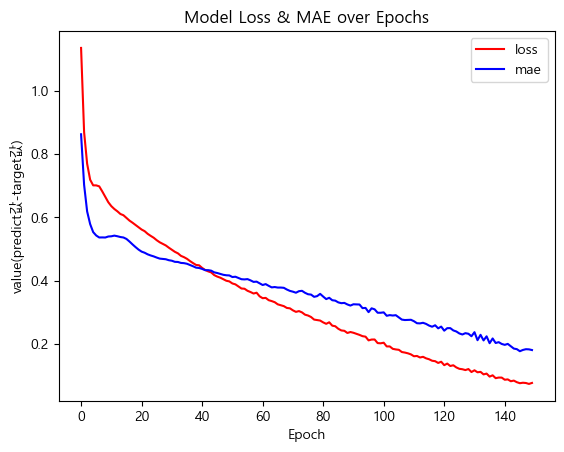

In [46]:
plt.plot(hist.history['loss'],'r',label='loss')
plt.plot(hist.history['mae'],'b',label='mae')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('value(predict값-target값)')
plt.title('Model Loss & MAE over Epochs')
plt.show()

In [47]:
# 역스케일조정
y_pred_original = scaler_y.inverse_transform(y_pred)
y_test_original = scaler_y.inverse_transform(y_test)
for y,h in zip(y_test_original,y_pred_original):
    print(f'실제값:{y[0]:.2f},예측값:{h[0]:.2f}')

실제값:-8.41,예측값:-7.47
실제값:2.00,예측값:1.72
실제값:-1.97,예측값:-1.85
실제값:-0.44,예측값:-2.25
실제값:-4.66,예측값:-0.03
실제값:0.64,예측값:-1.33
실제값:0.54,예측값:-1.11
실제값:-1.99,예측값:-1.05
실제값:0.27,예측값:-3.52
실제값:-7.78,예측값:0.33
실제값:0.27,예측값:0.10
실제값:-2.26,예측값:-3.66
실제값:-6.56,예측값:-2.10
실제값:-2.27,예측값:-0.72
실제값:-1.11,예측값:1.27
실제값:-5.68,예측값:-0.02
실제값:0.91,예측값:-1.40
실제값:-10.97,예측값:1.83
실제값:1.63,예측값:-1.55
실제값:0.68,예측값:-3.77


In [48]:
# 한국인 데이터로 예측해보기
y_pred_scaled= scaler_X.transform(korean_data)
korean_pred = model.predict(y_pred_scaled)
korean_pred

68/68 [==============================] - 0s 809us/step


array([[ 0.46481612],
       [-0.2803586 ],
       [-0.55118424],
       ...,
       [ 0.88786703],
       [ 0.4846768 ],
       [ 1.9791957 ]], dtype=float32)

In [49]:
weight_predict=[]
korean_pred_original = scaler_y.inverse_transform(korean_pred)
for idx, i in enumerate(korean_pred_original):
    print(f"{idx + 1}번째: 몸무게변화예측 = {i[0]:.2f}")
    weight_predict.append([i[0]])
korean_data['체중변화예측']=weight_predict

1번째: 몸무게변화예측 = 0.30
2번째: 몸무게변화예측 = -2.20
3번째: 몸무게변화예측 = -3.11
4번째: 몸무게변화예측 = -0.96
5번째: 몸무게변화예측 = -1.83
6번째: 몸무게변화예측 = -1.27
7번째: 몸무게변화예측 = -2.64
8번째: 몸무게변화예측 = -0.30
9번째: 몸무게변화예측 = 0.82
10번째: 몸무게변화예측 = -3.42
11번째: 몸무게변화예측 = -0.08
12번째: 몸무게변화예측 = 2.29
13번째: 몸무게변화예측 = -1.93
14번째: 몸무게변화예측 = -0.69
15번째: 몸무게변화예측 = 6.30
16번째: 몸무게변화예측 = 0.82
17번째: 몸무게변화예측 = 1.18
18번째: 몸무게변화예측 = 0.82
19번째: 몸무게변화예측 = 2.20
20번째: 몸무게변화예측 = 1.77
21번째: 몸무게변화예측 = 0.96
22번째: 몸무게변화예측 = -3.79
23번째: 몸무게변화예측 = -7.69
24번째: 몸무게변화예측 = 0.86
25번째: 몸무게변화예측 = 0.08
26번째: 몸무게변화예측 = 2.78
27번째: 몸무게변화예측 = 2.29
28번째: 몸무게변화예측 = -3.40
29번째: 몸무게변화예측 = 2.97
30번째: 몸무게변화예측 = 2.11
31번째: 몸무게변화예측 = -6.34
32번째: 몸무게변화예측 = 2.99
33번째: 몸무게변화예측 = 2.24
34번째: 몸무게변화예측 = -6.34
35번째: 몸무게변화예측 = 1.16
36번째: 몸무게변화예측 = 0.28
37번째: 몸무게변화예측 = 3.75
38번째: 몸무게변화예측 = -4.68
39번째: 몸무게변화예측 = 0.54
40번째: 몸무게변화예측 = 1.37
41번째: 몸무게변화예측 = -1.02
42번째: 몸무게변화예측 = 1.33
43번째: 몸무게변화예측 = 1.16
44번째: 몸무게변화예측 = -2.31
45번째: 몸무게변화예측 = -5.16
46번째: 몸무게변화예측 = 5.12
47번째: 몸무게변화예측 = -1.40
4

In [50]:
korean_data.to_csv('../data/korean_data_pred.csv',index= False)

In [51]:
model.save('saved_model/pred_model')

INFO:tensorflow:Assets written to: saved_model/pred_model\assets


INFO:tensorflow:Assets written to: saved_model/pred_model\assets


In [53]:
from tensorflow.keras.models import load_model
loaded_model = load_model('saved_model/pred_model')

In [55]:
korean_data.reset_index(drop=True)

,나이,성별,신장,체중,활동량계수,BMR,에너지 섭취량(Kcal),일일 칼로리 잉여/적자,체중변화예측
0,70.0,2.0,151.2,41.8,1.00,1359.26000,922.289958,-436.970042,[0.30064106]
1,42.0,1.0,172.5,67.7,1.00,2269.65700,2243.391641,-26.265359,[-2.2027638]
2,38.0,2.0,160.9,43.4,1.00,1665.77800,1649.091552,-16.686448,[-3.112599]
3,34.0,2.0,162.8,68.4,1.00,1941.21200,1501.215719,-439.996281,[-0.9615368]
4,46.0,1.0,165.3,62.0,1.15,2383.75562,1874.773750,-508.981870,[-1.8307949]
...,...,...,...,...,...,...,...,...,...
2144,72.0,2.0,153.2,60.2,1.00,1532.18400,1294.454663,-237.729337,[1.5510137]
2145,36.0,2.0,165.7,55.9,1.00,1831.44600,1381.958947,-449.487053,[0.01727771]
2146,62.0,2.0,158.6,59.7,1.00,1635.80800,1067.107202,-568.700798,[1.721875]
2147,80.0,1.0,162.4,63.3,1.00,1783.01340,1346.633466,-436.379934,[0.36736274]
